In [41]:
#MNIST pair of digits recognition using NN model
#Yi Cong Li (20122756)
#this code is built using inpirations from:
#https://medium.com/@muhammetbolat/supervised-unsupervised-techniques-on-mnist-dataset-3f2ffd4c41c5
#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

#please make sure to run this code in default kaggle notebook environnment of competition

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import collections
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-mnist-digits/train_result.csv
/kaggle/input/classification-of-mnist-digits/train.csv
/kaggle/input/classification-of-mnist-digits/test.csv


In [42]:
#loading train data
train_data = '/kaggle/input/classification-of-mnist-digits/train.csv'
df = pd.read_csv(train_data)
df = df.drop(['Unnamed: 1568'], axis = 1)
X_train = df.values

#loading test data
test_data = '/kaggle/input/classification-of-mnist-digits/test.csv'
df_test = pd.read_csv(test_data)
df_test = df_test.drop(['Unnamed: 1568'], axis = 1)
test_features = df_test.values

#loading train labels
train_result_data = '/kaggle/input/classification-of-mnist-digits/train_result.csv'
df_train_result = pd.read_csv(train_result_data)
y_train = df_train_result['Class'].to_numpy()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


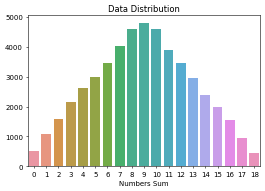

In [43]:
#We can see that data are unevenly distributed since sums in middle (e.g. 8,9,10, etc.) will have more combinations of 2 digits
samples = collections.Counter(y_train)
fig, ax = plt.subplots(1, 1, dpi=50)
ax = sns.barplot(list(samples.keys()), list(samples.values()))
ax.set_title("Data Distribution")
ax.set_xlabel('Numbers Sum')

plt.show()


In [44]:
#Oversampling to fix the distribution issue
oversample = RandomOverSampler(sampling_strategy='not majority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [45]:
#one hot encoding
y_train = to_categorical(y_train)


In [46]:
model = Sequential()
model.add(Dense(1024, input_dim=28*56, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(19, activation='softmax'))

In [47]:
EPOCHS = 8
BATCH_SIZE = 64
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(history.epoch) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.epoch) + 1), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

pred = model.predict(test_features)
pred_class = np.argmax(pred, axis = 1)
output = pd.DataFrame({'Index': np.arange(test_features.shape[0]), 'Class': pred_class})
output.to_csv('submission.csv', index=False)

Epoch 1/8
1142/1142 [==============================] - 18s 16ms/step - loss: 0.8099 - accuracy: 0.7451 - val_loss: 0.6663 - val_accuracy: 0.7964
Epoch 2/8
1142/1142 [==============================] - 18s 16ms/step - loss: 0.2653 - accuracy: 0.9210 - val_loss: 0.2824 - val_accuracy: 0.9183
Epoch 3/8
1142/1142 [==============================] - 17s 15ms/step - loss: 0.1535 - accuracy: 0.9528 - val_loss: 0.1685 - val_accuracy: 0.9504
Epoch 4/8
1142/1142 [==============================] - 18s 16ms/step - loss: 0.1037 - accuracy: 0.9675 - val_loss: 0.1094 - val_accuracy: 0.9635
Epoch 5/8
1142/1142 [==============================] - 17s 15ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.0999 - val_accuracy: 0.9685
Epoch 6/8
1142/1142 [==============================] - 19s 16ms/step - loss: 0.0644 - accuracy: 0.9793 - val_loss: 0.1716 - val_accuracy: 0.9451
Epoch 7/8
1142/1142 [==============================] - 17s 15ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0835 - val_ac

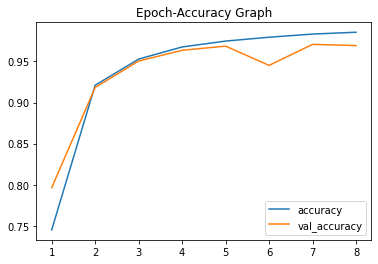

In [48]:
plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(history.epoch) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.epoch) + 1), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [49]:
pred = model.predict(test_features)
pred_class = np.argmax(pred, axis = 1)
output = pd.DataFrame({'Index': np.arange(test_features.shape[0]), 'Class': pred_class})
output.to_csv('submission.csv', index=False)